# Data Jobs Market Intelligence

*Exploratory analysis of data-science job postings and compensation patterns across countries.*


## Executive Snapshot

- Quantify the distribution of job records across countries and identify coverage gaps.
- Characterize salary behavior (central tendency, dispersion, and extreme values).
- Compare compensation by country and evaluate key drivers (e.g., English proficiency, experience, education).
- Summarize linear relationships and run an interpretable baseline regression to explain salary variation.

## Contents

1. Data coverage by country
2. Salary distribution and outliers
3. Salary comparison by country
4. English proficiency vs salary
5. Experience & education by country (South America)
6. Correlation analysis
7. Salary vs features (scatter diagnostics)
8. Country-specific correlation deep dive
9. Baseline multiple linear regression


In [103]:
df.head()

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD,HasCountry
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621,1
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195,1
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,4,9,4.988700,3474,1
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,1.766855,2195,1
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,1,4,6.331954,1037,1


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1000 non-null   object 
 1   Location         1000 non-null   object 
 2   Title            1000 non-null   object 
 3   Company          1000 non-null   object 
 4   Url              1000 non-null   object 
 5   CountryScore     515 non-null    float64
 6   English          1000 non-null   int64  
 7   EducationLevel   1000 non-null   int64  
 8   YearsExperience  1000 non-null   int64  
 9   CompanyScore     1000 non-null   float64
 10  SalaryUSD        1000 non-null   int64  
 11  HasCountry       1000 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [13]:
import pandas as pd

# Load the Excel file
file_path = 'datost3.xlsx'

# Read the sheet "datost3"
df = pd.read_excel(file_path, sheet_name='datost3')

# Preview the first rows of the DataFrame
df.head()


,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,4,9,4.988700,3474
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,1.766855,2195
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,1,4,6.331954,1037


In [16]:
cantidad_datos = df["Location"].count()
cantidad_datos

1000

In [26]:
valores_unicos = df['Country'].unique()
valores_unicos

array(['Chile', 'Argentina', 'Colombia', 'Ecuador', 'Brasil', 'Venezuela',
       'Uruguay', 'Paraguay', 'Bolivia', 'Suriname', 'Guyana'],
      dtype=object)

In [28]:
df['HasCountry'] = df['Country'].apply(lambda x: 1 if pd.notnull(x) else 0)

# Display the DataFrame
print(df)


    Country                                       Location  \
0     Chile  Santiago, Santiago Metropolitan Region, Chile   
1     Chile  Santiago, Santiago Metropolitan Region, Chile   
2     Chile  Santiago, Santiago Metropolitan Region, Chile   
3     Chile              Rancagua, O'Higgins Region, Chile   
4     Chile  Santiago, Santiago Metropolitan Region, Chile   
..      ...                                            ...   
995  Guyana              Mahaica, Demerara-Mahaica, Guyana   
996  Guyana                                         Guyana   
997  Guyana                                         Guyana   
998  Guyana              Mahaica, Demerara-Mahaica, Guyana   
999  Guyana              Mahaica, Demerara-Mahaica, Guyana   

                                                 Title         Company  \
0                                       Data Scientist       BICE VIDA   
1                                       Data Scientist      BNamericas   
2                                

## 1. Data coverage by country

In [32]:
pt_pais = pd.pivot_table(df, 
                             values='HasCountry', 
                             index=['Country'], 
                             aggfunc='sum')

# Display the pivot table
print(pt_pais)

           HasCountry
Country              
Argentina          75
Bolivia           120
Brasil            100
Chile              75
Colombia           72
Ecuador            99
Guyana            120
Paraguay           94
Suriname           50
Uruguay           100
Venezuela          95


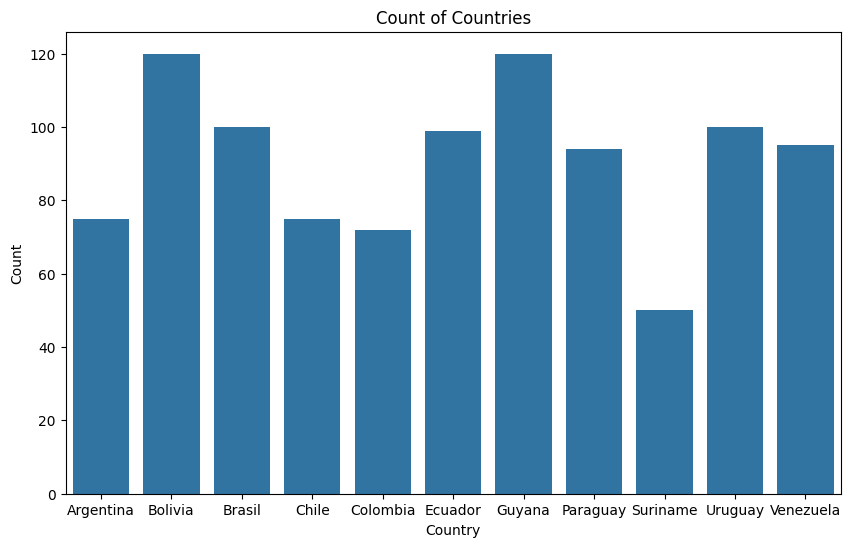

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Create the bar plot using los data from the pivot table
sns.barplot(data=pt_pais, x='Country', y='HasCountry')

# Add titles and labels
plt.title('Count of Countries')
plt.xlabel('Country')
plt.ylabel('Count')

# Render the plot
plt.show()

## 2. Salary distribution and outliers

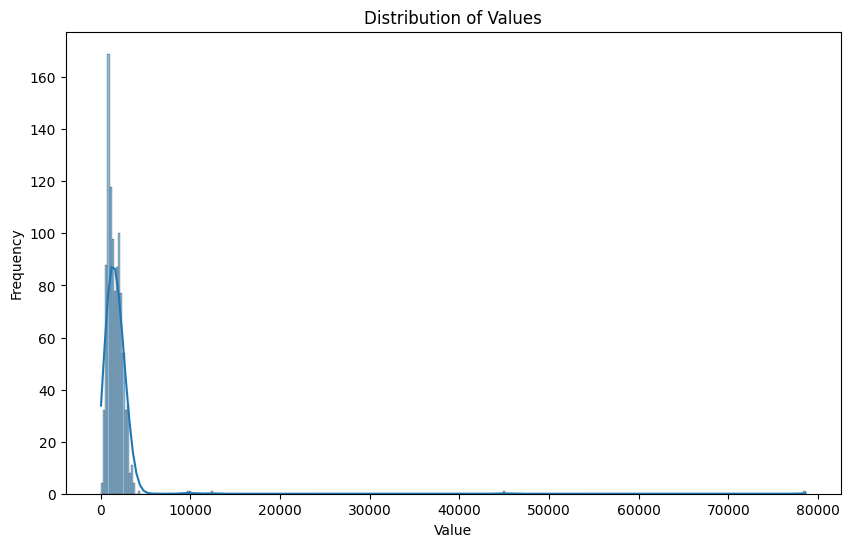

In [44]:
### ANSWER A
# Set figure size
plt.figure(figsize=(10, 6))

# Create the histogram con kde=True para mostrar la distribución normal
sns.histplot(df['SalaryUSD'], kde=True)

# Add titles and labels
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Render the plot
plt.show()


In [47]:
### ANSWER A
print(df['SalaryUSD'].describe())


count     1000.00000
mean      1722.12300
std       2935.96947
min         42.00000
25%        933.00000
50%       1475.00000
75%       2134.00000
max      78600.00000
Name: SalaryUSD, dtype: float64


In [49]:
### ANSWER B
# Create the pivot table
pt_pais2 = pd.pivot_table(df, 
                         values='SalaryUSD', 
                         index=['Country'], 
                         aggfunc='max')

# Sort the pivot table in ascending order
pt_pais2= pt_pais2.sort_values(by='SalaryUSD', ascending=True)

# Display the pivot table ordenada
print(pt_pais2)

           SalaryUSD
Country             
Venezuela       1280
Bolivia         1481
Ecuador         2337
Paraguay        2615
Colombia        3145
Argentina       3328
Uruguay         3523
Brasil          3730
Chile           4144
Guyana         44900
Suriname       78600


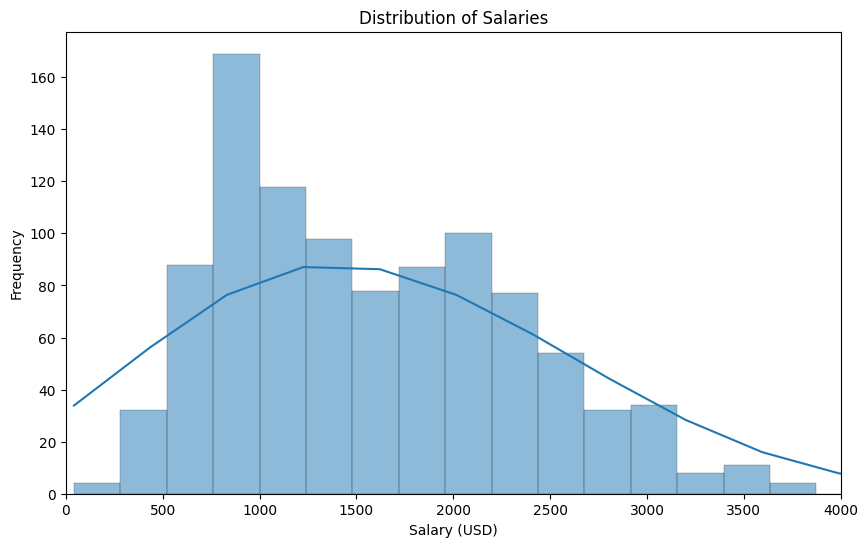

In [46]:

plt.figure(figsize=(10, 6))

# Create the histogram con kde=True para mostrar la distribución normal
ax = sns.histplot(df['SalaryUSD'], kde=True)

# Adjust the x-axis range
ax.set_xlim(0, 4000)

# Add titles and labels
plt.title('Distribution of Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')

# Render the plot
plt.show()


## 3. Salary comparison by country


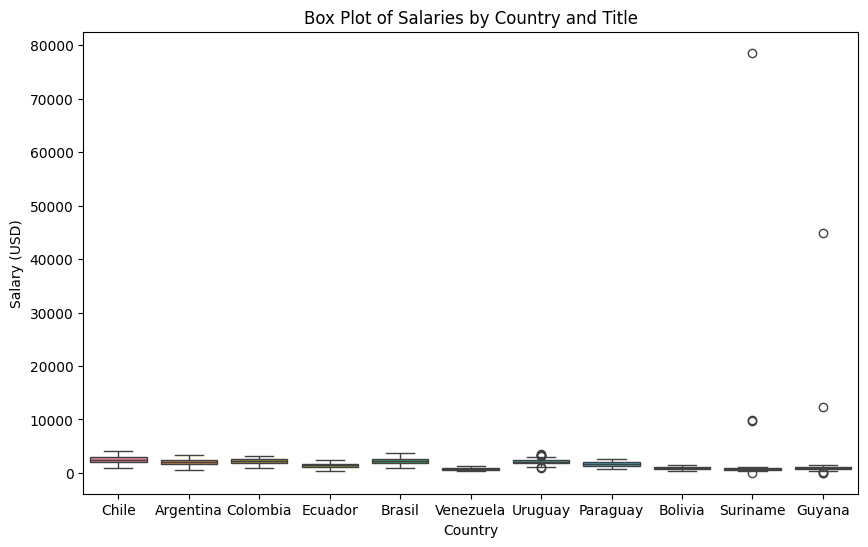

In [51]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(data=df, x='Country', y='SalaryUSD', hue='Country')

# Add titles and labels
plt.title('Box Plot of Salaries by Country and Title')
plt.xlabel('Country')
plt.ylabel('Salary (USD)')

# Render the plot
plt.show()

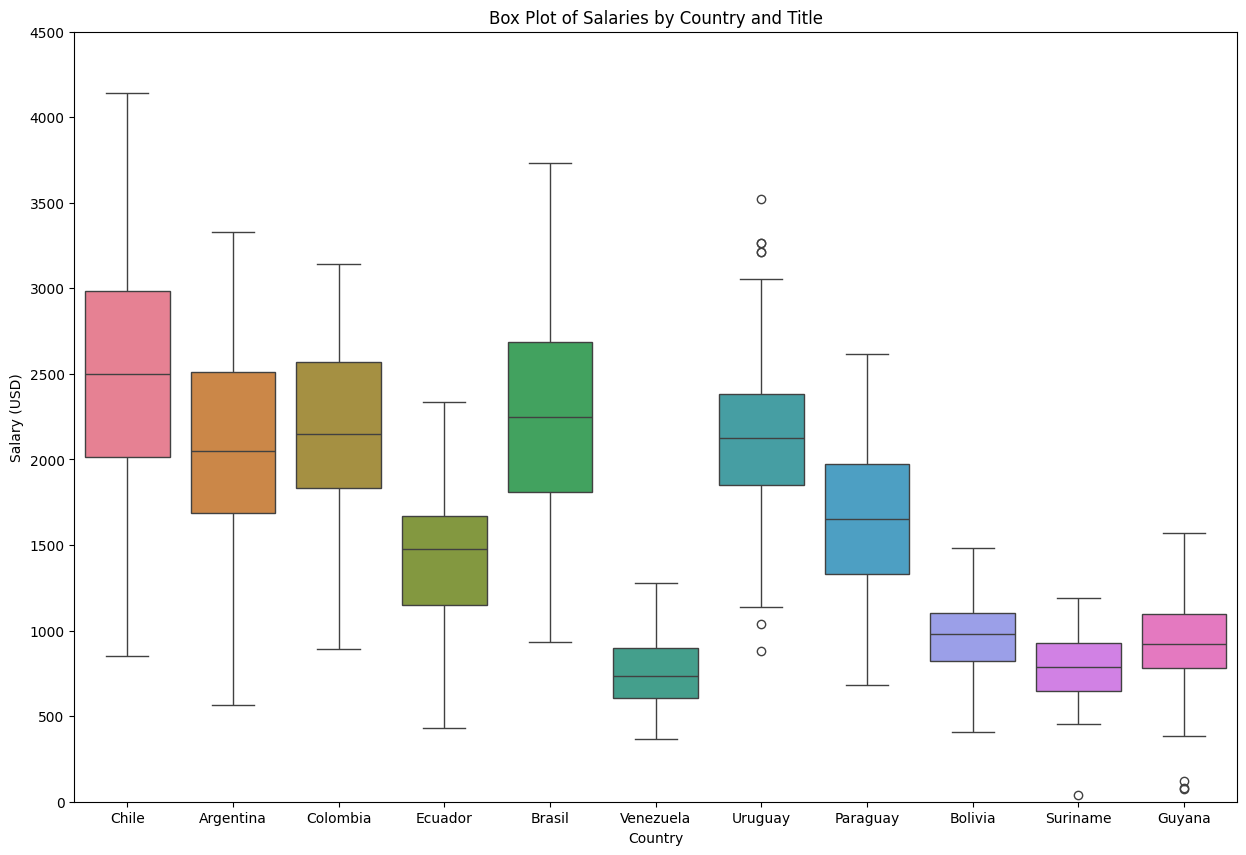

In [61]:

# Set figure size
plt.figure(figsize=(15, 10))  # Cambia los valores según sea necesario para expandir la imagen

# Create the box plot
ax = sns.boxplot(data=df, x='Country', y='SalaryUSD', hue='Country')

# Ajustar el rango del eje y
ax.set_ylim(0, 4500)

# Add titles and labels
plt.title('Box Plot of Salaries by Country and Title')
plt.xlabel('Country')
plt.ylabel('Salary (USD)')

# Render the plot
plt.show()

In [63]:
# Generar un resumen estadístico agrupado por 'Country' y 'Title'
describe_df = df.groupby(['Country'])['SalaryUSD'].describe()
print(describe_df)


           count         mean           std    min      25%     50%      75%  \
Country                                                                        
Argentina   75.0  2064.706667    557.087910  564.0  1690.00  2048.0  2509.00   
Bolivia    120.0   979.175000    224.633807  407.0   824.25   980.0  1105.00   
Brasil     100.0  2251.630000    579.178182  933.0  1811.00  2249.0  2688.00   
Chile       75.0  2488.013333    731.737999  854.0  2012.00  2499.0  2987.00   
Colombia    72.0  2153.861111    477.555522  892.0  1835.00  2149.0  2569.00   
Ecuador     99.0  1439.787879    389.148318  432.0  1151.00  1475.0  1672.00   
Guyana     120.0  1368.866667   4150.084594   74.0   779.50   920.0  1099.00   
Paraguay    94.0  1673.978723    454.022499  684.0  1328.00  1650.0  1971.00   
Suriname    50.0  2672.140000  11105.100165   42.0   644.50   786.0   928.25   
Uruguay    100.0  2147.760000    503.502242  881.0  1852.25  2124.0  2383.00   
Venezuela   95.0   740.915789    193.255

In [ ]:
Paises con mayores salarios 
Chile y Brazil
Paises con salarios medios 
Argentina 
Colombia 
Uruguay 

Paises con menores salarios 
Venezuela 
Suriname 

## 4. English proficiency vs salary

In [78]:
import pandas as pd

# Supongamos que df es tu DataFrame inicial
# Filtrar el DataFrame para incluir solo las filas donde 'English' es 1
f_filtered = df[df['English'] == 1]

# Create the pivot table con el DataFrame filtrado
pt_pais5 = pd.pivot_table(f_filtered, 
                          values='SalaryUSD', 
                          index=['Country'], 
                          aggfunc='mean')

# Sort the pivot table in ascending order
pt_pais5 = pt_pais5.sort_values(by='SalaryUSD', ascending=True)

# Display the pivot table ordenada
print(pt_pais5)


             SalaryUSD
Country               
Venezuela   833.313725
Guyana     1037.233333
Bolivia    1072.328125
Ecuador    1633.235294
Paraguay   1896.673469
Argentina  2307.483871
Uruguay    2322.116667
Colombia   2362.242424
Brasil     2633.255814
Chile      2802.750000
Suriname   4135.862069


In [79]:
import pandas as pd

# Supongamos que df es tu DataFrame inicial
# Filtrar el DataFrame para incluir solo las filas donde 'English' es 1
f_filtered = df[df['English'] == 0]

# Create the pivot table con el DataFrame filtrado
pt_pais4 = pd.pivot_table(f_filtered, 
                          values='SalaryUSD', 
                          index=['Country'], 
                          aggfunc='mean')

# Sort the pivot table in ascending order
pt_pais4= pt_pais4.sort_values(by='SalaryUSD', ascending=True)

# Display the pivot table ordenada
print(pt_pais4)


             SalaryUSD
Country               
Venezuela   633.818182
Suriname    650.809524
Bolivia     872.714286
Ecuador    1234.250000
Paraguay   1431.488889
Guyana     1700.500000
Uruguay    1886.225000
Argentina  1893.659091
Chile      1928.481481
Brasil     1963.736842
Colombia   1977.538462


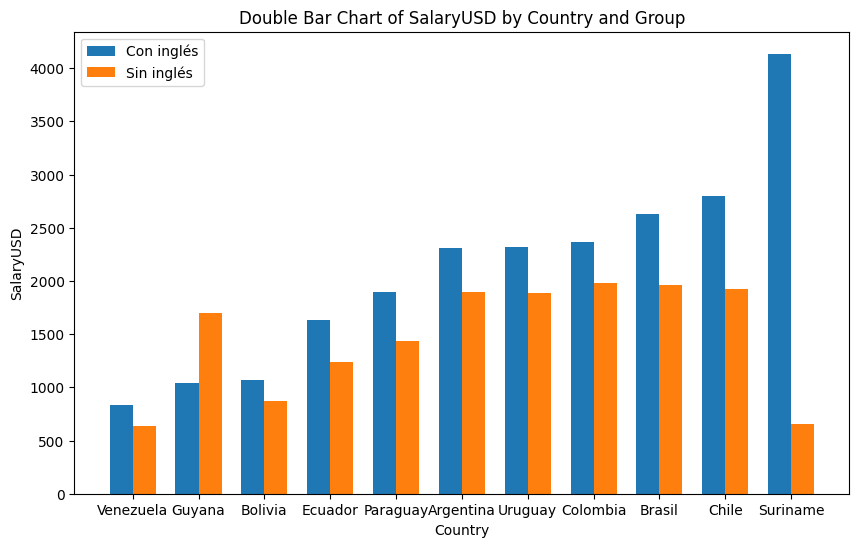

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que pt_pais5 y pt_pais4 son tablas pivot con una estructura similar
# Aquí se usa df_pt_pais5 y df_pt_pais4 para representar las versiones en DataFrame de las tablas pivot

# Ejemplo de cómo convertir tablas pivot a DataFrames (asegúrate de ajustarlo a tus necesidades)
df_pt_pais5 = pt_pais5.reset_index()
df_pt_pais4 = pt_pais4.reset_index()

# Combinar los DataFrames en uno solo
combined_df = pd.merge(df_pt_pais5, df_pt_pais4, on='Country', suffixes=('_pt_pais5', '_pt_pais4'))

# Definir posición de las barras
bar_width = 0.35
index = range(len(combined_df))

# Crear el plot
fig, ax = plt.subplots(figsize=(10, 6))

# Barras del Grupo pt_pais5
bar1 = plt.bar(index, combined_df['SalaryUSD_pt_pais5'], bar_width, label='Con inglés')

# Barras del Grupo pt_pais4
bar2 = plt.bar([i + bar_width for i in index], combined_df['SalaryUSD_pt_pais4'], bar_width, label='Sin inglés')

# Etiquetas y título
plt.xlabel('Country')
plt.ylabel('SalaryUSD')
plt.title('Double Bar Chart of SalaryUSD by Country and Group')
plt.xticks([i + bar_width / 2 for i in index], combined_df['Country'])
plt.legend()

# Render the plot
plt.show()


## 5. Experience and education by country (South America)

In [93]:
pt_pais6= pd.pivot_table(f_filtered, 
                         values=['EducationLevel'],  # Reemplaza 'OtherColumn' con el nombre de la segunda columna que quieras incluir
                         index=['Country'], 
                         aggfunc='mean')
# Sort the pivot table in ascending order por 'SalaryUSD'
pt_pais6= pt_pais6.sort_values(by='Country', ascending=True)
pt_pais6= pt_pais6.round(0).astype(int)
# Display the pivot table ordenada
print(pt_pais6)

           EducationLevel
Country                  
Argentina               3
Bolivia                 3
Brasil                  3
Chile                   2
Colombia                3
Ecuador                 3
Guyana                  3
Paraguay                3
Suriname                3
Uruguay                 3
Venezuela               3


In [99]:
pt_pais7= pd.pivot_table(f_filtered, 
                         values=['YearsExperience'],  # Reemplaza 'OtherColumn' con el nombre de la segunda columna que quieras incluir
                         index=['Country'], 
                         aggfunc='mean')
# Sort the pivot table in ascending order por 'SalaryUSD'
pt_pais7= pt_pais7.sort_values(by='Country', ascending=True)
pt_pais7= pt_pais7.round(0).astype(int)
# Display the pivot table ordenada
print(pt_pais7)

           YearsExperience
Country                   
Argentina                7
Bolivia                  7
Brasil                   7
Chile                    6
Colombia                 7
Ecuador                  7
Guyana                   7
Paraguay                 7
Suriname                 7
Uruguay                  7
Venezuela                7


In [100]:
# Supongamos que pt_pais6 y pt_pais7 son tablas pivot con una estructura similar
# Aquí se usa df_pt_pais6 y df_pt_pais7 para representar las versiones en DataFrame de las tablas pivot

# Convertir tablas pivot a DataFrames
df_pt_pais6 = pt_pais6.reset_index()
df_pt_pais7 = pt_pais7.reset_index()

# Verificar los nombres de las columnas
print("Columnas de df_pt_pais6:", df_pt_pais6.columns)
print("Columnas de df_pt_pais7:", df_pt_pais7.columns)

# Combinar los DataFrames en uno solo
combined_df = pd.merge(df_pt_pais7, df_pt_pais6, on='Country', suffixes=('_pt_pais7', '_pt_pais6'))

# Verificar los nombres de las columnas después de combinar
print("Columnas de combined_df:", combined_df.columns)


Columnas de df_pt_pais6: Index(['Country', 'EducationLevel'], dtype='object')
Columnas de df_pt_pais7: Index(['Country', 'YearsExperience'], dtype='object')
Columnas de combined_df: Index(['Country', 'YearsExperience', 'EducationLevel'], dtype='object')


Columnas de combined_df: Index(['Country', 'YearsExperience', 'EducationLevel'], dtype='object')


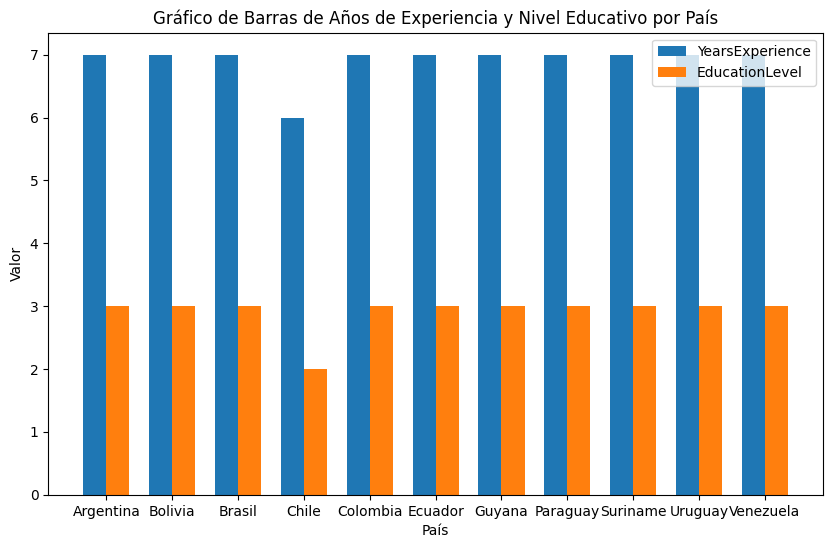

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que pt_pais6 y pt_pais7 son tablas pivot con una estructura similar
# Convertir tablas pivot a DataFrames
df_pt_pais6 = pt_pais6.reset_index()
df_pt_pais7 = pt_pais7.reset_index()

# Combinar los DataFrames en uno solo
combined_df = pd.merge(df_pt_pais7, df_pt_pais6, on='Country', suffixes=('_pt_pais7', '_pt_pais6'))

# Verificar los nombres de las columnas después de combinar
print("Columnas de combined_df:", combined_df.columns)

# Definir posición de las barras
bar_width = 0.35
index = range(len(combined_df))

# Crear el plot
fig, ax = plt.subplots(figsize=(10, 6))

# Barras del Grupo YearsExperience
bar1 = plt.bar(index, combined_df['YearsExperience'], bar_width, label='YearsExperience')

# Barras del Grupo EducationLevel
bar2 = plt.bar([i + bar_width for i in index], combined_df['EducationLevel'], bar_width, label='EducationLevel')

# Etiquetas y título
plt.xlabel('País')
plt.ylabel('Valor')
plt.title('Gráfico de Barras de Años de Experiencia y Nivel Educativo por País')
plt.xticks([i + bar_width / 2 for i in index], combined_df['Country'])
plt.legend()

# Render the plot
plt.show()


## 6. Correlation Analysis

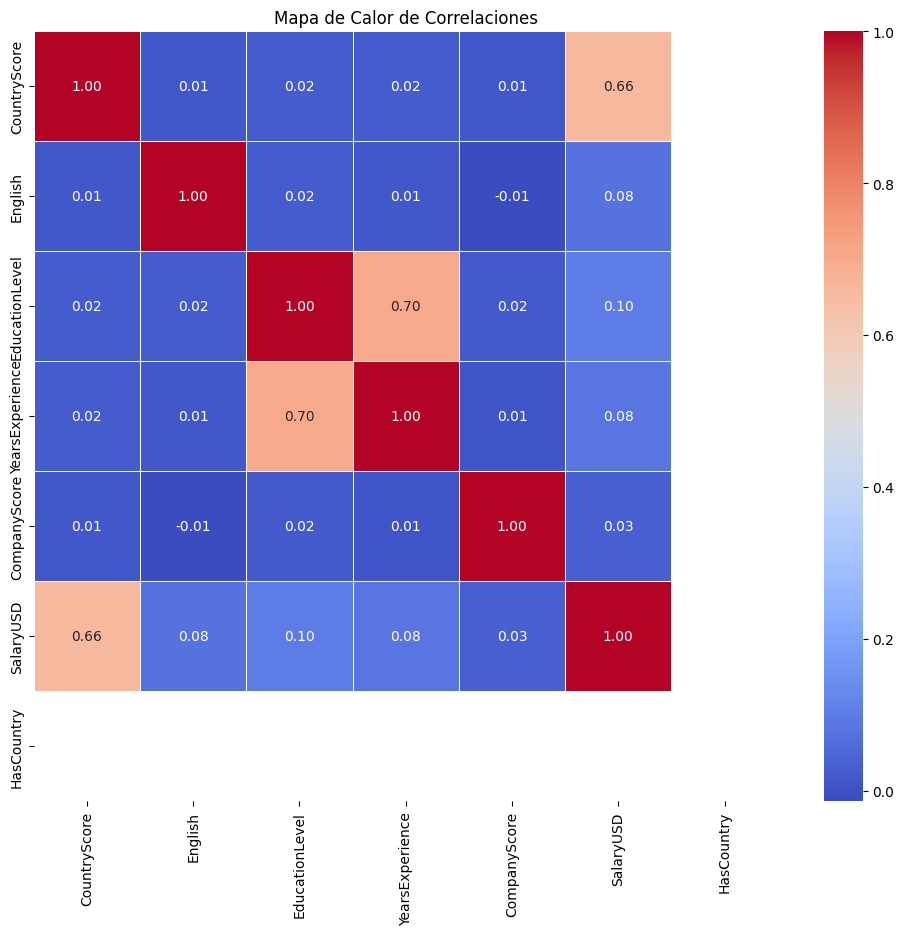

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Crear la matriz de correlación
corr_matrix = numeric_df.corr()

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()


## 7. Salary vs other variables (scatter diagnostics)



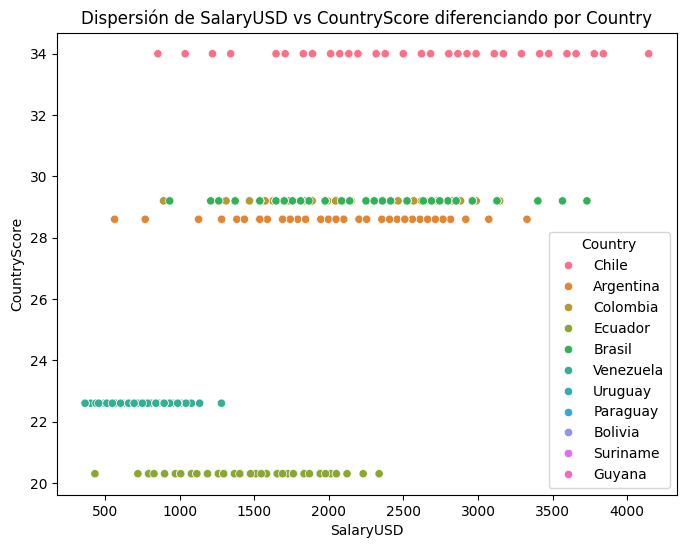

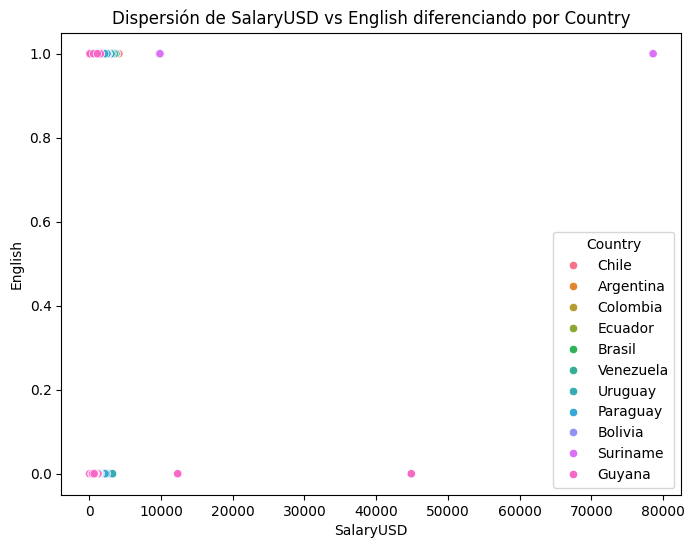

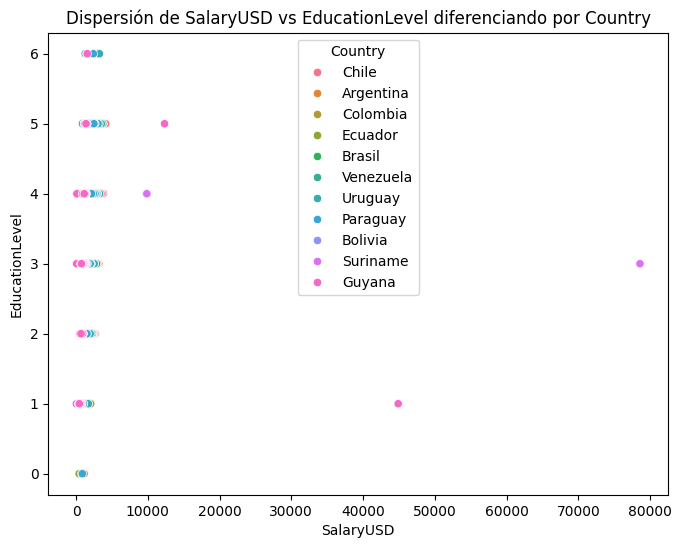

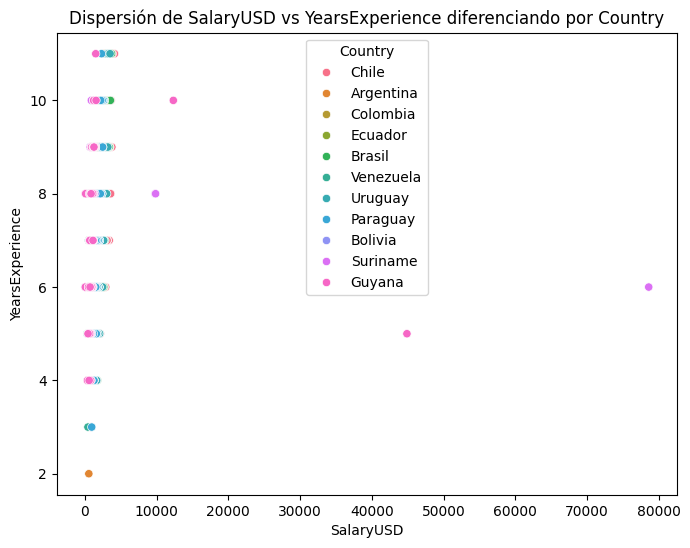

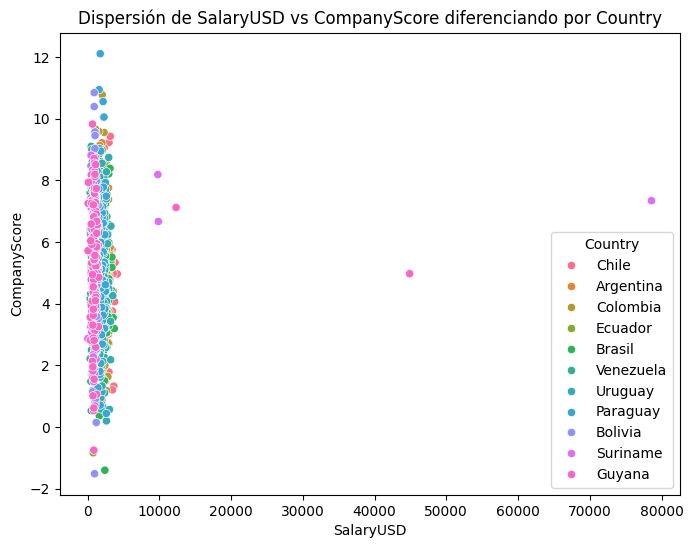

In [119]:
#Respuesta A
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Especificar la columna de interés, la columna a excluir y la columna para hue
columna_interes = 'SalaryUSD'  # Columna que deseas comparar con las demás
columna_a_excluir = 'HasCountry'  # Columna que deseas excluir
columna_hue = 'Country'  # Columna para diferenciar los subgrupos (puede ser categórica o numérica)

# Crear plots de dispersión para cada par (columna de interés vs otras columnas, excluyendo la columna especificada)
for column in numeric_df.columns:
    if column != columna_interes and column != columna_a_excluir:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=numeric_df, x=columna_interes, y=column, hue=df[columna_hue])
        plt.title(f'Dispersión de {columna_interes} vs {column} diferenciando por {columna_hue}')
        plt.xlabel(columna_interes)
        plt.ylabel(column)
        plt.show()



## 8. Country-Specific Correlation Deep Dive

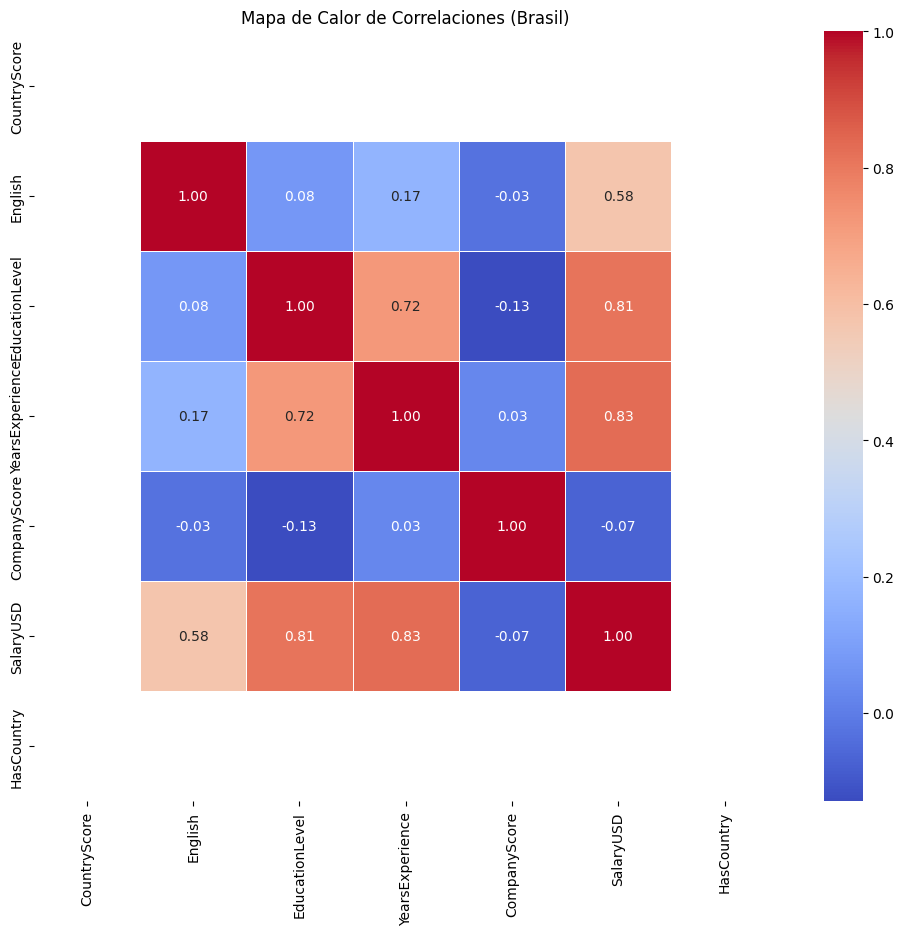

In [121]:
f_filtered = df[df['Country'] == "Brasil"]
numeric_df_filtered = f_filtered.select_dtypes(include=['float64', 'int64'])
corr_matrix_filtered = numeric_df_filtered.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones (Brasil)')
plt.show()


## 9. Baseline multiple linear regression

In [124]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


predictors = ['CountryScore', 'English', 'EducationLevel', 'YearsExperience', 'CompanyScore']
target = 'SalaryUSD'


X = df[predictors]


y = df[target]

#
X = X.fillna(X.mean())
y = y.fillna(y.mean())

X = sm.add_constant(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = sm.OLS(y_train, X_train).fit()


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     4.456
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           0.000521
Time:                        19:13:01   Log-Likelihood:                -7595.4
No. Observations:                 800   AIC:                         1.520e+04
Df Residuals:                     794   BIC:                         1.523e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2727.8600   1136.174     

In [131]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

f_filtered = df[df['Country'] == "Brasil"]
predictors = ['CountryScore', 'English', 'EducationLevel', 'YearsExperience', 'CompanyScore']
target = 'SalaryUSD'

X = f_filtered[predictors]
y = f_filtered[target]

X = X.fillna(X.mean())
y = y.fillna(y.mean())

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, X_train).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.064e+08
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          2.02e-252
Time:                        19:33:11   Log-Likelihood:                -1.5762
No. Observations:                  80   AIC:                             13.15
Df Residuals:                      75   BIC:                             25.06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
CountryScore        0.0370      0.005     